In [1]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline  

import torch
import torch.nn as nn

import torch.optim as optim

from copy import deepcopy

from torch.distributions import Categorical

import itertools

import sys
sys.path.insert(0, './../libraries/')

import partial_marginalization_lib as pm_lib
import gmm_experiments_lib as gmm_lib

In [2]:
softmax = nn.Softmax(dim = 0)

sigmoid = nn.Sigmoid()

In [3]:
import torch

In [4]:
np.random.seed(45224)
_ = torch.manual_seed(45224)

In [5]:
mu0 = torch.Tensor([0, 0])
sigma0 = 2.
n_clusters = 5

n_obs = 200

In [6]:
gmm_experiment = gmm_lib.GMMExperiments(n_obs, mu0, sigma0, n_clusters, hidden_dim=100)

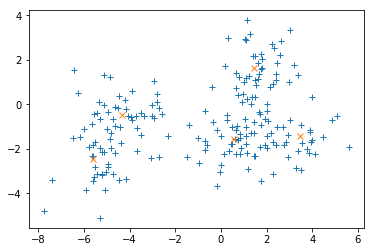

In [7]:
plt.plot(gmm_experiment.y[:, 0].numpy(), gmm_experiment.y[:, 1].numpy(), '+')
plt.plot(gmm_experiment.true_mus[:, 0].numpy(), gmm_experiment.true_mus[:, 1].numpy(), 'x')

In [8]:
obj_class_reinforce = pm_lib.PartialMarginalizationREINFORCE(gmm_experiment)

In [9]:
obj_class_reinforce.experiment_class.set_kmeans_init_var_params()
# obj_class_reinforce.experiment_class.set_random_var_params()

In [10]:
# check kmeans init
centroids_init = obj_class_reinforce.experiment_class.var_params['centroids']
obj_class_reinforce.set_and_get_log_q()

z_ind = np.argmax(obj_class_reinforce.class_weights.numpy(), axis = 1)

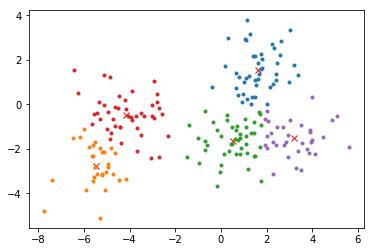

In [11]:
plt.figure()

plt.plot(centroids_init[:, 0].detach().numpy(), 
         centroids_init[:, 1].detach().numpy(), 'x', color = 'red')
# plt.plot(gmm_experiment.true_mus[:, 0].numpy(), 
#          gmm_experiment.true_mus[:, 1].numpy(), 'x', color = 'blue')

for i in range(n_clusters): 
    plt.plot(gmm_experiment.y.numpy()[z_ind == i, 0], 
            gmm_experiment.y.numpy()[z_ind == i, 1], '.')


In [ ]:
vb_params_opt, losses = obj_class_reinforce.run_SGD(alpha=0.0, topk = 5, lr = 1, n_steps=1000, 
                                               use_true_grad = True)

class_weights tensor([[ 0.0878,  0.6488,  0.0878,  0.0878,  0.0878],
        [ 0.0878,  0.0878,  0.0878,  0.6488,  0.0878],
        [ 0.6488,  0.0878,  0.0878,  0.0878,  0.0878],
        [ 0.0878,  0.0878,  0.0878,  0.0878,  0.6488],
        [ 0.0878,  0.0878,  0.0878,  0.0878,  0.6488],
        [ 0.0878,  0.0878,  0.6488,  0.0878,  0.0878],
        [ 0.0878,  0.0878,  0.0878,  0.0878,  0.6488],
        [ 0.6488,  0.0878,  0.0878,  0.0878,  0.0878],
        [ 0.6488,  0.0878,  0.0878,  0.0878,  0.0878],
        [ 0.6488,  0.0878,  0.0878,  0.0878,  0.0878],
        [ 0.0878,  0.0878,  0.0878,  0.6488,  0.0878],
        [ 0.0878,  0.0878,  0.0878,  0.0878,  0.6488],
        [ 0.0878,  0.6488,  0.0878,  0.0878,  0.0878],
        [ 0.0878,  0.6488,  0.0878,  0.0878,  0.0878],
        [ 0.0878,  0.0878,  0.6488,  0.0878,  0.0878],
        [ 0.6488,  0.0878,  0.0878,  0.0878,  0.0878],
        [ 0.0878,  0.0878,  0.0878,  0.0878,  0.6488],
        [ 0.0878,  0.0878,  0.6488,  0.0878,  0.087

In [ ]:
plt.plot(losses)

In [33]:
class_weights_opt = deepcopy(obj_class_reinforce.class_weights)
centroids_opt = vb_params_opt['centroids']
sigma_opt = vb_params_opt['log_sigma']

z_ind = torch.argmax(obj_class_reinforce.class_weights, dim=1).numpy()

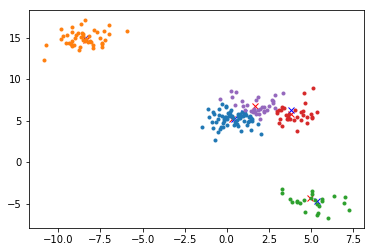

In [34]:
plt.figure()
plt.plot(centroids_opt[:, 0].detach().numpy(), 
         centroids_opt[:, 1].detach().numpy(), 'x', color = 'red')
plt.plot(gmm_experiment.true_mus[:, 0].numpy(), 
         gmm_experiment.true_mus[:, 1].numpy(), 'x', color = 'blue')

for i in range(n_clusters): 
    plt.plot(gmm_experiment.y.numpy()[z_ind == i, 0], 
            gmm_experiment.y.numpy()[z_ind == i, 1], '.')
    

In [35]:
torch.argmax(obj_class_reinforce.class_weights, dim=1)[0:4]

tensor([ 4,  2,  1,  4])

In [36]:
gmm_experiment.z[0:4]

tensor([ 3.,  4.,  1.,  0.])

In [37]:
obj_class_reinforce.class_weights

tensor([[ 0.0162,  0.0045,  0.0061,  0.0184,  0.9548],
        [ 0.0026,  0.0010,  0.9914,  0.0026,  0.0024],
        [ 0.0022,  0.9928,  0.0011,  0.0018,  0.0021],
        [ 0.0173,  0.0061,  0.0051,  0.0153,  0.9562],
        [ 0.0022,  0.9927,  0.0011,  0.0018,  0.0022],
        [ 0.0166,  0.0041,  0.0072,  0.9540,  0.0181],
        [ 0.0026,  0.9912,  0.0012,  0.0022,  0.0027],
        [ 0.0188,  0.0046,  0.0071,  0.0198,  0.9498],
        [ 0.0164,  0.0042,  0.0070,  0.9544,  0.0181],
        [ 0.0175,  0.0047,  0.0064,  0.0184,  0.9530],
        [ 0.9530,  0.0058,  0.0059,  0.0160,  0.0193],
        [ 0.0158,  0.0045,  0.0058,  0.0180,  0.9558],
        [ 0.9473,  0.0048,  0.0076,  0.0195,  0.0208],
        [ 0.9595,  0.0053,  0.0060,  0.0132,  0.0160],
        [ 0.0034,  0.0012,  0.9887,  0.0036,  0.0031],
        [ 0.0116,  0.0030,  0.0072,  0.9653,  0.0130],
        [ 0.9539,  0.0051,  0.0066,  0.0160,  0.0184],
        [ 0.0125,  0.0033,  0.0066,  0.9634,  0.0142],
        [ 